# Task 2-1

## Reconstruct Rydberg wave function from projective measurement results

- Train RBMs by changing number of hidden nodes: $n_h$.
- See if any convergence regarding energy is shown.
- The original task requires us to achieve criteria of energy diferecene $< 0.0001$, eventually we found that the criteria is not achievable considering statistical aspects.

## Training
- Training was done using the grid search for $n_h \in [1, 1000)$  with increasing coarseness for larger $n_h$
- To achieve statistical error under $~\sim 0.0001$, we increased sampling size to $20000$ when calculating energy.
- Tried the exponential learning schedule, because the required criteria is not achieved.


## Results

### $n_h \in [1, 10)$
- Horizontal axis is for epochs.
- Vertical axis is for energy difference.
- Each line represents respective $n_h$.
- While there is a point near $0.0001$, it seems outlier.
- Almost no improvement even if we increase node count. This means the convergence of the model is already achieved w.r.t. $n_h$.

Minimum value: 0.000135593578351134


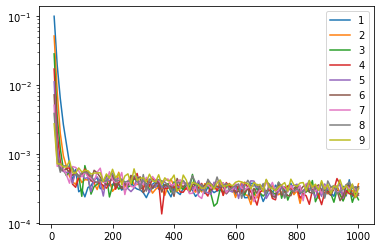

In [20]:
import numpy as np
import pandas as pd

df = pd.read_csv('training_logs/task2-1_9.csv', index_col=0, header=None, names=list(range(10, 1001, 10)))
ax = df.T.plot()
ax.set_yscale('log')

print(f"Minimum value: {df.min().min()}")

### $n_h \in [20, 100).$
- Horizontal axis is for epochs.
- Vertical axis is for energy difference.
- Each line represents respective $n_h$.
- Same behavior for larger $n_h > 100$.
- We can conclude that for this task, RBM can only achieve energy difference $\sim 0.0005$[eV] by this training method.

Minimum value: 0.00019645658596800783


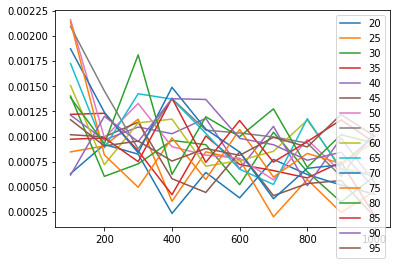

In [12]:

df = pd.read_csv('training_logs/task2-20_100.csv', index_col=0, names=list(range(100, 1001, 100)))
df.T.plot()

print(f"Minimum value: {df.min().min()}")

## Discussion
- Even if the original criteria: $|\Delta E| < 0.0001$ is achievable on any outlier, we have to consider statistical aspects to conclude that the model capacity is enough for further calculation.
 - We have to see `convergence` instead of single `achievement` to see true learning details.
 - For that, we can define a convergence criteria and use the converged $E$ to check the `achievement`.
 - Let's say $\epsilon$ an error target. One idea is to see epoch moving averaged $|\Delta E|$ and if it fluctuates around some value in $o(\epsilon)$, e.g. $\frac{\epsilon}{10}$, for pre-defined periods, we can say it is converged.
 - For RBM, negative log likelihood $\mathcal{L}$ is used as a loss function, therefore this will be an alternative to $|\Delta E|$.